## Jazda na wózku CartPole

> **Problem**: Jeśli Piotr chce uciec przed wilkiem, musi poruszać się szybciej niż on. Zobaczymy, jak Piotr może nauczyć się jeździć na wózku, a w szczególności utrzymywać równowagę, korzystając z Q-Learning.

Najpierw zainstalujmy bibliotekę gym i zaimportujmy wymagane biblioteki:


In [1]:
#code block 1

## Stwórz środowisko cartpole


In [ ]:
#code block 2

Aby zobaczyć, jak działa środowisko, uruchommy krótką symulację na 100 kroków.


In [ ]:
#code block 3

Podczas symulacji musimy uzyskać obserwacje, aby zdecydować, jak działać. W rzeczywistości funkcja `step` zwraca nam bieżące obserwacje, funkcję nagrody oraz flagę `done`, która wskazuje, czy kontynuowanie symulacji ma sens, czy nie:


In [ ]:
#code block 4

Możemy uzyskać minimalną i maksymalną wartość tych liczb:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Przeanalizujmy również inną metodę dyskretyzacji za pomocą przedziałów:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Uruchommy teraz krótką symulację i zaobserwujmy te dyskretne wartości środowiska.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


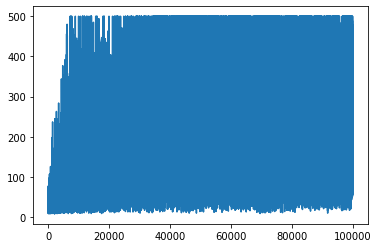

In [20]:
plt.plot(rewards)

Z tego wykresu nie można nic powiedzieć, ponieważ ze względu na charakter procesu stochastycznego długość sesji treningowych znacznie się różni. Aby lepiej zrozumieć ten wykres, możemy obliczyć **średnią kroczącą** dla serii eksperymentów, powiedzmy 100. Można to wygodnie zrobić za pomocą `np.convolve`:


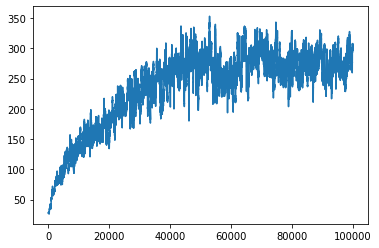

In [22]:
#code block 12

## Zmienianie hiperparametrów i obserwowanie wyników w praktyce

Teraz byłoby interesujące zobaczyć, jak faktycznie zachowuje się wytrenowany model. Uruchommy symulację, stosując tę samą strategię wyboru akcji, co podczas treningu: próbkowanie zgodnie z rozkładem prawdopodobieństwa w Q-Table:


In [23]:
# code block 13

## Zapisywanie wyniku jako animowany GIF

Jeśli chcesz zaimponować znajomym, możesz wysłać im animowany obraz GIF przedstawiający balansującą tyczkę. Aby to zrobić, możemy użyć `env.render`, aby wygenerować klatkę obrazu, a następnie zapisać je jako animowany GIF za pomocą biblioteki PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Zastrzeżenie**:  
Ten dokument został przetłumaczony za pomocą usługi tłumaczenia AI [Co-op Translator](https://github.com/Azure/co-op-translator). Chociaż dokładamy wszelkich starań, aby tłumaczenie było precyzyjne, prosimy pamiętać, że automatyczne tłumaczenia mogą zawierać błędy lub nieścisłości. Oryginalny dokument w jego rodzimym języku powinien być uznawany za źródło autorytatywne. W przypadku informacji o kluczowym znaczeniu zaleca się skorzystanie z profesjonalnego tłumaczenia przez człowieka. Nie ponosimy odpowiedzialności za jakiekolwiek nieporozumienia lub błędne interpretacje wynikające z użycia tego tłumaczenia.
